Epoch 1/50


c:\Users\Rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4528 - loss: 0.7583 - val_accuracy: 0.4000 - val_loss: 0.7877
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 0.7241 - val_accuracy: 0.6000 - val_loss: 0.7216
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.6682 - val_accuracy: 0.6667 - val_loss: 0.6612
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.6416 - val_accuracy: 0.7667 - val_loss: 0.6098
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8158 - loss: 0.6128 - val_accuracy: 0.9000 - val_loss: 0.5640
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8993 - loss: 0.5848 - val_accuracy: 0.9667 - val_loss: 0.5202
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.5642 - val_accuracy: 1.0000 - val_loss: 0.4798
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.5217 - val_accuracy: 1.0000 - val_loss: 0.4422
Epo

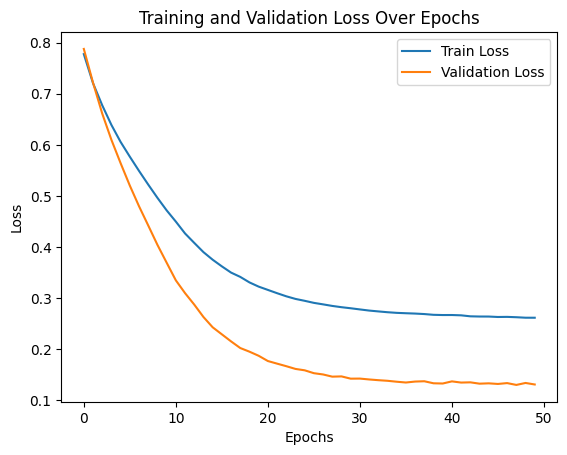

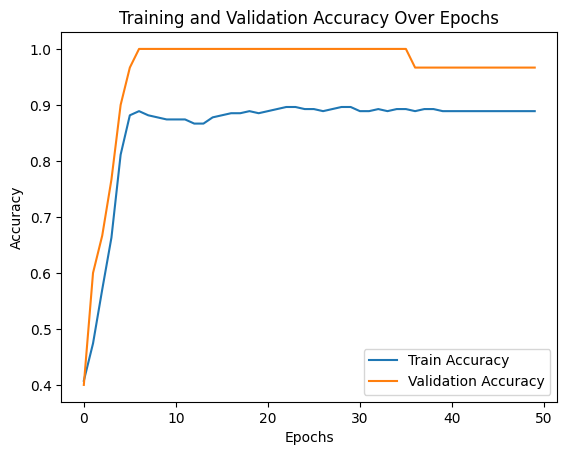

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load the Dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Step 3: Data Preprocessing

# Select features and target variable
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Step 4: Build the ANN Model

# Initialize the ANN
model = Sequential()

# Add the input layer and first hidden layer with 8 neurons and ReLU activation
model.add(Dense(units=8, activation="relu", input_shape=(X_train.shape[1],)))

# Add a second hidden layer with 8 neurons and ReLU activation
model.add(Dense(units=8, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation (for binary classification)
model.add(Dense(units=1, activation="sigmoid"))

# Step 5: Compile the ANN
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 6: Train the ANN
history = model.fit(
    X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1
)

# Step 7: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plotting Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Plotting Training and Validation Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy Over Epochs")
plt.show()